In [3]:
import strawberryfields as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
#import h5py
#from datetime import datetime
#import seaborn as sns
#from utility import *

In [2]:
def OneModeCoherentHO(a,p,shots):
    """
    Function that performs sensing using a single coherent state and performing homodyne measurements
    
    Args:
    
        a : amplitude with which coherent state is initiated
        p : phase with which coherent state is initiated
        shots (integer) : number of repeated iid measurements to perform
    
    Returns:
    
        list (real) average amplitude measured along the x-quadrature of the coherent state.
        Theoreticall, equal to a on average; in practice, equal to 2a on average in Strawberry Fields
    """
    s1 = np.zeros(shots)
    
    for i in range(shots):
        prog= sf.Program(1)
        
        with prog.context as q:
            sf.ops.Coherent(a,p) | q[0] # State preparation
            sf.ops.MeasureX | q[0] # Het. Msmnt of signal 1

        eng = sf.Engine("bosonic")
        results = eng.run(prog)
    
        #Collecting the samples
        samples = results.all_samples
    
        #Creating the measurement records
        s1[i] = samples[0][0]
    
    return s1


In [3]:
np.array.size?

Object `np.array.size` not found.


[1.15083787 1.266014   1.13459618 1.1295747  0.86829925 1.03534987
 1.41373208 0.73905469 1.15502316 1.12721631 0.60131877 1.10526435
 1.01304506 1.1639137  0.9121666  0.91221857 0.88989919 0.66895896
 1.01580705 0.8358952  0.89580835 1.21153617 1.01501019 1.12048129
 1.20435777 0.9722275  1.00875321 1.28456495 0.96581921 1.09942704
 0.90579988 1.24410851 1.18717882 1.32251521 0.8514153  1.13719578
 0.98615221 1.04468515 0.93982282 0.95602148 0.61676528 0.67148287
 1.0801254  1.00639228 1.17606899 1.04237434 0.85124885 1.1136882
 1.01693349 0.93655048 1.01517136 1.08076435 0.95740141 1.10229234
 1.07432592 0.74358407 1.41499345 1.21094266 0.83537768 1.18602141
 1.04699169 1.60643533 1.08029292 0.55939645 1.16455075 0.59260776
 1.1310116  1.14871712 0.6613899  0.88929323 0.82537175 1.2973725
 1.20926696 0.78503716 0.88142348 0.71844088 0.72915822 0.90478996
 0.91169233 1.01186773 1.03499563 1.01326533 0.71767937 1.22828562
 0.90088654 0.67835383 1.36889996 0.89046648 1.06443696 0.828951

<function matplotlib.pyplot.show(close=None, block=None)>

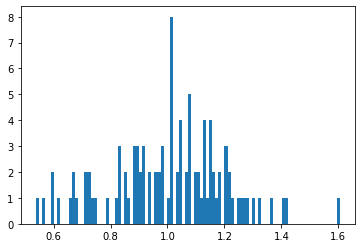

In [60]:
sample_set = np.zeros(100)
for i in range(sample_set.size):
    sample_set.put(i,np.mean(OneModeCoherentHO(1/2, 0, 30)))
    
print(sample_set)
plt.hist(sample_set,bins=100)
#plt.plot(sample_set)
plt.show

In [24]:
np.mean(sample_set)

0.9988182969605189

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


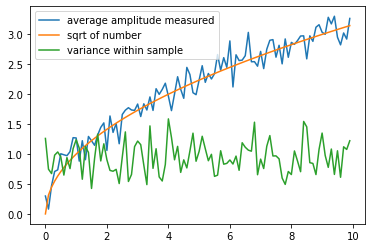

[0.29877692 0.0810492  0.47304079 0.70929328 0.73606208 1.00535302
 0.98840715 0.97347228 1.0403773  1.27402002 1.26917584 0.88249165
 1.22310142 0.90549852 1.29436856 1.22169656 1.14639971 1.31818364
 1.44586514 1.52101725 1.0602342  1.63659201 1.36222048 1.50929947
 1.17266449 1.66125775 1.73385524 1.77477913 1.73680687 1.72972858
 1.83572063 1.6277993  1.83989726 1.73646556 1.95481652 1.72957075
 2.09222815 1.99782207 2.0807829  2.18407621 1.96730544 1.72642452
 2.00612939 2.29241361 2.08267407 1.93211889 2.44838016 2.32891462
 2.02531889 1.99265944 2.23840073 2.47672113 2.1990097  2.34625094
 2.25475147 2.34388879 2.6629326  2.40141724 2.61104335 2.4497955
 2.89084582 2.12174756 2.6589097  2.56317171 2.56979204 2.64409154
 3.0332199  2.54260568 2.54429479 2.46841197 2.71543793 2.428511
 2.75183563 2.9018071  2.91234065 2.61930588 2.81803634 2.50773309
 2.92408264 2.61747499 2.86594596 2.83356629 2.89605116 2.97301401
 2.97548197 2.5911163  2.97574856 2.88387313 3.11955776 3.1616497

In [84]:
# test for systems with 1 to n photons
n_max = 10
steps = 100
shots = 30
x_set = np.arange(0,n_max, n_max/steps)
print(x_set)
all_value_set = np.zeros([steps, shots])
y_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    row = OneModeCoherentHO(np.sqrt(i*n_max/steps/4), 0, shots)
    #print(row)
    all_value_set[i] = row
    y_set.put(i, np.mean(all_value_set[i]))
    variance.put(i, np.var(all_value_set[i]))

plt.plot(x_set,y_set, label="average amplitude measured")
plt.plot(x_set, np.sqrt(x_set), label="sqrt of number")
plt.plot(x_set, variance, label="variance within sample")
plt.legend()
plt.show()
print(y_set)

In [85]:
np.mean(variance)

0.9450522456034607

[ 2.12351686e+02 -1.00611839e+01 -3.60494975e+00 -2.39695473e+00
 -4.56888637e+00 -3.62070934e+00 -4.20234484e+00 -3.17407082e+00
 -2.85877267e+00 -2.76969297e+00 -2.45831541e+00  1.12881175e+00
 -8.97817871e-01 -2.78731908e+00 -1.32566059e+00 -5.17999870e-01
 -1.36434676e+00 -1.65980780e+00 -4.65801593e-01 -1.11060417e+00
 -2.29672252e+00 -1.83991170e+00 -1.65332164e+00  1.31232510e-02
 -1.56371934e+00 -3.44309314e+00 -1.20640000e+00 -1.17255086e+00
 -9.47399111e-01 -2.61346783e+00  2.16607953e-02 -2.97392848e+00
 -8.47735676e-02 -6.10027177e-01 -1.35173980e+00 -3.25377631e-01
 -9.20442457e-01 -3.85079769e-01 -1.35821685e+00 -2.32044389e+00
 -1.68339977e+00 -7.31574139e-01 -1.11116534e+00 -1.54701656e-01
 -1.85382591e+00 -2.14918611e+00 -4.20445320e+00 -3.02787376e-01
 -1.91397070e+00 -2.51205788e+00  2.25676689e+00 -2.51205788e+00
 -1.91397070e+00 -3.02787376e-01 -4.20445320e+00 -2.14918611e+00
 -1.85382591e+00 -1.54701656e-01 -1.11116534e+00 -7.31574139e-01
 -1.68339977e+00 -2.32044

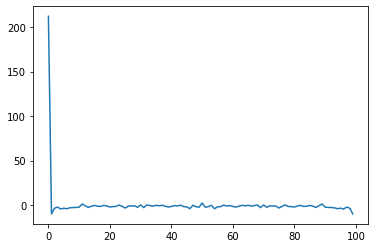

In [86]:
fourier = np.fft.fft(y_set)
plt.plot(np.real(fourier))
print(np.real(fourier))

In [88]:
def OneModeCoherentHD(a, p, shots):
    """
    Function that performs sensing using a single coherent state and performing heterodyne measurements

    Args:
    
        Ns (float) : Average number of photons in the #1 mode
        t,nth (float,float) : channel transmittivity and number of thermal photons for the thermal loss channel
        shots (integer) : number of repeated iid measurements to perform
    
    Returns:
    
        list, list (complex,complex): returns the complex signal <X>+i<P> of both modes
    
    
    
    """
    s1 = (1+1j)*np.zeros(shots)

    
    for i in range(shots):
        prog= sf.Program(1)
        
        with prog.context as q:
        
            sf.ops.Coherent(a, p) | q[0] # State preparation
            sf.ops.MeasureHD | q[0] # Het. Msmnt of signal 1


        # Need to run twice because of bug in the bosonic backend in dealing with repeated HD measurements
    
        eng = sf.Engine("bosonic")
        results = eng.run(prog)
        
    
        #Collecting the samples
        samples = results.all_samples
    
        #Creating the measurement records
        s1[i] = samples[0][0]
    
    # Interation over number of shots is done, outputing the records
    
    return s1


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


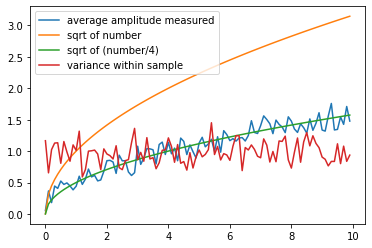

[0.05348131 0.36629861 0.17995981 0.44366651 0.4065439  0.52308964
 0.46974915 0.49334219 0.44500302 0.38313335 0.44114191 0.60031596
 0.47019832 0.55460119 0.71401951 0.58923334 0.61322902 0.52577321
 0.54026415 0.67829291 0.84726843 0.85268029 0.82595297 0.64495603
 0.93474004 0.8452793  0.84716667 0.66768435 0.61148754 0.65640796
 1.0775559  0.78876889 0.89008034 1.039349   1.03575209 1.02089866
 0.79569595 1.10442617 1.14314464 0.94630149 1.14006444 0.95693821
 1.04724205 0.84670091 1.20716587 1.15461449 0.94483322 1.09883408
 0.99018873 0.89095153 1.12962544 1.21958494 1.06839823 1.11475326
 1.18750041 0.99633749 1.22864858 0.98266897 1.32499085 1.26258559
 1.16642311 1.19801726 1.15944915 1.2084327  1.21486776 1.16063936
 1.24801238 1.4834681  1.29602253 1.28017436 1.40525686 1.56072516
 1.50284608 1.43466487 1.27761645 1.49353585 1.42565578 1.38381712
 1.29377819 1.54547528 1.47677583 1.35114141 1.29709486 1.43495446
 1.37259628 1.28581467 1.51201962 1.33083115 1.44123835 1.6106

In [92]:
# test for systems with 1 to n photons
n_max = 10
steps = 100
shots = 30
x_set = np.arange(0,n_max, n_max/steps)
print(x_set)
all_value_set = np.zeros([steps, shots])*(1+1j)
y_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    row = OneModeCoherentHD(np.sqrt(i*n_max/steps/4), 0, shots)
    #print(row)
    all_value_set[i] = row
    y_set.put(i, np.mean(np.real(all_value_set[i])))
    variance.put(i, np.var(all_value_set[i]))

plt.plot(x_set,y_set, label="average amplitude measured")
plt.plot(x_set, np.sqrt(x_set), label="sqrt of number")
plt.plot(x_set, np.sqrt(x_set/4), label="sqrt of (number/4)")
plt.plot(x_set, variance, label="variance within sample")
plt.legend()
plt.show()
print(y_set)

The behavior for heterodyne detection seems to obey expectations, while homodyne does not. Below, I create states with amplitude $a$ and phase 0, and then measure them in the x quadrature; you see that the measured amplitude is on average twice what I have set it to.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


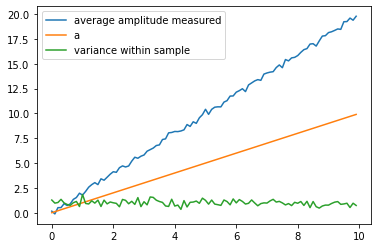

[ 0.15452683 -0.12292397  0.50860212  0.51414462  0.90793319  0.72417424
  0.88629775  1.3415888   1.52823419  1.96385032  1.77300216  2.14432097
  2.56924591  2.82943654  3.02856778  2.83099014  3.41309045  3.27079855
  3.57211043  3.87778703  4.125907    4.06836428  4.53120212  4.71333597
  4.60574665  4.70644131  5.19041021  5.58640877  5.48487057  5.69025321
  5.81210305  6.19531495  6.35190287  6.51018836  6.76537367  6.82849157
  7.37181997  7.43719148  8.04491351  8.08076821  8.18262325  8.16846183
  8.23177427  8.34705348  8.87917235  8.68862065  9.15745572  9.00026836
  9.55817698  9.87284618 10.41692158  9.90515459 10.40923108 10.62667552
 10.66462429 10.65850535 11.1400368  11.28462383 11.74650469 11.76016527
 12.14048549 12.29374517 12.48589182 12.19889731 12.8691161  13.07149128
 13.2752755  13.40324887 13.3340242  13.96168394 14.07584826 14.15766879
 14.20371247 14.61706006 14.88205134 14.60423006 15.42814387 15.29282923
 15.59377541 15.64780687 15.82787411 16.14947319 16

In [95]:
# test for systems with 1 to n photons
n_max = 10
steps = 100
shots = 30
x_set = np.arange(0,n_max, n_max/steps)
print(x_set)
all_value_set = np.zeros([steps, shots])
y_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    a = x_set[i]
    row = OneModeCoherentHO(a, 0, shots)
    #print(row)
    all_value_set[i] = row
    y_set.put(i, np.mean(all_value_set[i]))
    variance.put(i, np.var(all_value_set[i]))

plt.plot(x_set,y_set, label="average amplitude measured")
plt.plot(x_set, x_set, label="a")
plt.plot(x_set, variance, label="variance within sample")
plt.legend()
plt.show()
print(y_set)

## Heterodyne detection from scratch
Below, I will attempt to perform heterodyne detection from scratch by creating a coherent state, passing it through a beam splitter, and then measuring the x-quadrature of one of the two beams and the p-quadrature of the other. Theoretically, with original amplitude $\alpha$, each of the created modes $s_0$ and $s_1$ should have equal quadratures $x_1 = x_2$ and $p_1 = p_2$ (actually I am unsure of this), and the same amplitude $\frac{\alpha}{2}$. Therefore, the vector sum of the x-quadrature of the first mode and the p-quadrature of the second mode should yield a vector of magnitude $\frac{\alpha}{2}$.

In [22]:
def OneModeCoherentHDScratch(a,p,shots):
    s = np.zeros([2,shots])
    
    for i in range(shots):
        prog= sf.Program(2)
        
        with prog.context as q:
            sf.ops.Coherent(a,p) | q[0] # State preparation
            sf.ops.BSgate() | (q[0], q[1]) # Beam splitting
            sf.ops.MeasureX | q[0] # x-quadrature measurement of the first state. Expect 
            sf.ops.MeasureP | q[1] # Y-quadrature measurement of the second state

        eng = sf.Engine("bosonic")
        results = eng.run(prog)
    
        #Collecting the samples
        samples = results.all_samples
    
        #Creating the measurement records
        s[0][i] = samples[0][0]
        s[1][i] = samples[1][0]
        
    return s1
    

In [35]:
result = OneModeCoherentHDScratch(1, np.pi/4, 30)

In [36]:
print(result)

[[ 1.62318765  0.21804027  0.82617431  1.27033446  1.06170299  1.9801621
   2.54569631  1.52866411  1.99851317 -0.40255073  0.50255237  4.38352647
   3.16178665  2.58680877  0.16705001  1.00439165  0.66377114  1.27959279
   1.51638073 -0.88414508  0.55667914 -0.02571127  1.17784288  1.52781036
   2.05271133  1.65953266  2.3859421   0.07936558  0.69118305  0.57117386]
 [ 1.28961804 -0.73212087  1.75042217  2.16738785  1.91426406  0.54545983
   3.11597044  0.95628466  1.11426536  0.04434728  2.49066972  0.25097858
   1.33577577  1.08984486  1.70641397  2.04192935  2.16528543  1.57477993
   1.79631207  0.83906055  2.25590979  1.96576829  0.74606395  0.38743064
   2.23110495  0.46579068  1.4140486   0.64624458  2.18503309  1.43380631]]


In [37]:
print(np.mean(result[0]))

1.2569389948287417


In [38]:
print(np.mean(result[1]))

1.372938331079491


In [39]:
x_avg = np.mean(result[0])
p_avg = np.mean(result[1])
print(np.sqrt(x_avg**2 + p_avg**2))

1.8614121783389153


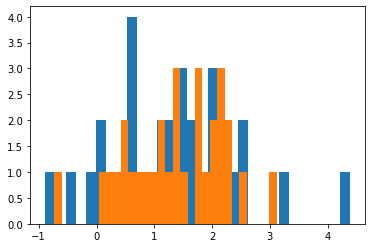

In [45]:
plt.hist(result[0], bins=30)
plt.hist(result[1], bins=30)
plt.show()

(array([ 3.,  0.,  4.,  5., 10.,  3.,  2.,  1.,  0.,  2.]),
 array([0.40498614, 0.80355807, 1.20213001, 1.60070194, 1.99927387,
        2.39784581, 2.79641774, 3.19498968, 3.59356161, 3.99213354,
        4.39070548]),
 <BarContainer object of 10 artists>)

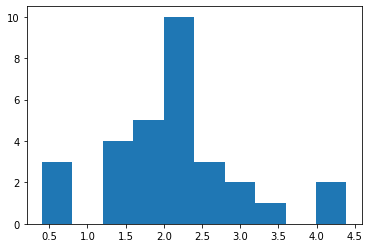

In [50]:
# plot a histogram of magnitudes of vector sums of x- and p-quadratures measured (via pythagorean theorem)
plt.hist(np.sqrt(result[0]**2 + result[1]**2))

### Results
Heterodyne detection from scratch seems to yield much larger (absolute) values than expected; performing vector summation of the measured quadratures leads to a magnitude of 2 instead of the expected 0.5 for an initial amplitude of 1.

I realized that there is a "shots" mechanism built-in to strawberry fields; perhaps using this mechanism will fix some of these errors?

**UPDATE:**
There is a reason for this (what a surprise!). The $a$ value given to a state is such that $\alpha = \frac{1}{\sqrt{2\hbar}}(x + ip)$. In this case, $\hbar = 2$ (this is defined in strawberry fields by default), so actually:
$$\alpha = \frac{x}{2} + \frac{ip}{2} = ae^{i\phi}$$ 
for phase $\phi$. When $\phi = 0$, you get that $a = \frac{x}{2} \implies x = 2a$, which explains the result obtained from homodyne measurement.

In a beam splitter, energy is conserved; energy is proportional to amplitude squared, so the amplitude of each outgoing beam is the original amplitude divided by the square root of 2 in an ideal 50/50 beamsplitter:
$$a' = \frac{a}{\sqrt{2}}$$.
Now, the following is true from before:
$$\sqrt{x'^2 + p'^2} = 2a' = 2\frac{a}{\sqrt{2}} = a\sqrt{2}$$
where $x'$ and $p'$ are the measurements of the output beams from the beam splitter. We can see this:

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75
 7.   7.25 7.5  7.75 8.   8.25 8.5  8.75 9.   9.25 9.5  9.75]


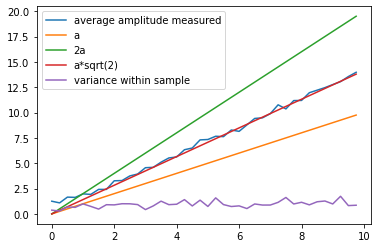

[ 1.25274686  1.08866218  1.65596132  1.63136057  1.97665488  1.92577548
  2.41933867  2.41802022  3.2676266   3.29154852  3.74800343  3.93524102
  4.55934111  4.59534873  5.1042508   5.52168738  5.61955064  6.33268794
  6.50051502  7.30167043  7.34080303  7.66162795  7.62344635  8.27880838
  8.14478265  8.77949081  9.41764612  9.47943942  9.89113087 10.7625845
 10.35730136 11.18078206 11.19449659 11.95518798 12.2052863  12.4589334
 12.75781658 13.05014939 13.55010442 13.97299622]


In [55]:
# test for systems with 1 to n photons
n_max = 10
steps = 40
shots = 30
x_set = np.arange(0,n_max, n_max/steps)
print(x_set)
all_value_set = np.zeros([steps, 2, shots])
amplitudes = np.zeros([steps, shots])
y_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    a = x_set[i]
    rows = OneModeCoherentHDScratch(a, 0, shots)
    #print(row)
    all_value_set[i] = rows
    amplitudes[i] = np.sqrt(rows[0]**2 + rows[1]**2)
    y_set.put(i, np.mean(amplitudes[i]))
    variance.put(i, np.var(amplitudes[i]))

plt.plot(x_set,y_set, label="average amplitude measured")
plt.plot(x_set, x_set, label="a")
plt.plot(x_set, x_set*2, label="2a")
plt.plot(x_set, x_set*np.sqrt(2), label="a*sqrt(2)")
plt.plot(x_set, variance, label="variance within sample")
plt.legend()
plt.show()
print(y_set)

In [1]:
np.mean(variance)

NameError: name 'np' is not defined

Now, we can change the phase of the state being measured, and we should observe a corresponding change in each of the quadratures:

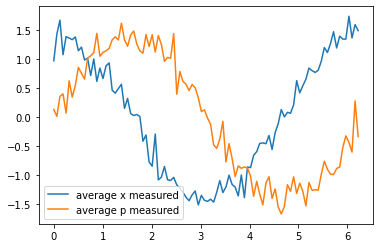

In [63]:
# test for systems with 1 to n photons
theta_max = 2*np.pi
steps = 100
shots = 30
theta_set = np.arange(0,theta_max, theta_max/steps)
all_value_set = np.zeros([steps, 2, shots])
p_set = np.zeros(steps)
x_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    a = theta_set[i]
    rows = OneModeCoherentHDScratch(1, a, shots)
    #print(row)
    all_value_set[i] = rows
    x_set.put(i, np.mean(rows[0]))
    p_set.put(i, np.mean(rows[1]))

plt.plot(theta_set,x_set, label="average x measured")
plt.plot(theta_set,p_set, label="average p measured")
plt.legend()
plt.show()

In [10]:
def sameQuadraturePostBS(a, p, shots):
    """
    Split a state through a beam splitter, and measure the two resulting states in the same quadrature.
    The objective is to examine e.g. the experimental covariance of the two; 
    Is noise introduced? Does the beam splitter behave as expected? etc.
    
    a = the amplitude of the state
    p = the phase
    shots = the number of times the process is repeated
    
    Returns:
    s1 = the 
    """
    s = np.zeros([2,shots])
    
    for i in range(shots):
        prog= sf.Program(2)
        
        with prog.context as q:
            sf.ops.Coherent(a,p) | q[0] # State preparation
            sf.ops.BSgate() | (q[0], q[1]) # Beam splitting
            sf.ops.MeasureX | q[0] # x-quadrature measurement of the first state
            sf.ops.MeasureX | q[1] # X-quadrature measurement of the second state

        eng = sf.Engine("bosonic")
        results = eng.run(prog)
    
        #Collecting the samples
        samples = results.all_samples
    
        #Creating the measurement records
        #samples is a dictionary {state_num : array(shots)}
        #there is only one shot for each iteration of this for-loop, 
        #so the first index is the state we are referencing
        #and the second index is 0
        s[0][i] = samples[0][0]
        s[1][i] = samples[1][0]
        
    return s

In [11]:
sameQuadraturePostBS(1, 0, 1)

array([[1.18869882],
       [1.21192718]])

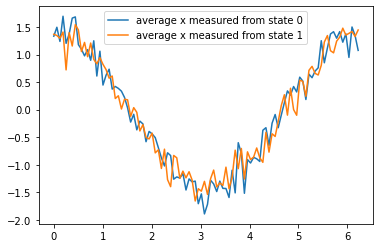

In [12]:
# test for systems with 1 to n photons
theta_max = 2*np.pi
steps = 100
shots = 30
theta_set = np.arange(0,theta_max, theta_max/steps)
all_value_set = np.zeros([steps, 2, shots])
x0_set = np.zeros(steps)
x1_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    a = theta_set[i]
    rows = sameQuadraturePostBS(1, a, shots)
    #print(row)
    all_value_set[i] = rows
    x0_set.put(i, np.mean(rows[0]))
    x1_set.put(i, np.mean(rows[1]))

plt.plot(theta_set,x0_set, label="average x measured from state 0")
plt.plot(theta_set,x1_set, label="average x measured from state 1")
plt.legend()
plt.show()

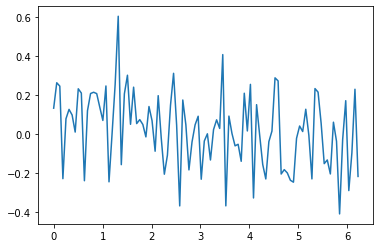

In [21]:
# Calculating covariance and mapping it as a function of the phase
covariance = np.zeros([steps])
for row_num in range(len(all_value_set)):
    #print(np.shape(all_value_set[row_num]))
    covariance[row_num] = sum(
        map(
            (lambda x,y : (x-x0_set[row_num])*(y-x1_set[row_num])), 
                                  all_value_set[row_num][0], all_value_set[row_num][1])
    )/(shots-1)
plt.plot(theta_set,covariance, label="covariance")

It seems like the covariance is bouncing around between 0.6 and -0.4 for any single phase. However, this is stupid (because both measurements vary entirely with noise); instead, we should allow the phase to vary:

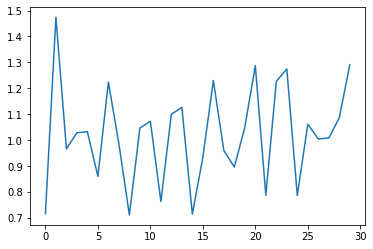

In [38]:
# Calculating covariance and mapping it as a function of the shots
covariance = np.zeros([shots])
for row_num in range(shots):
    #print(np.shape(all_value_set[row_num]))
    covariance[row_num] = sum(
        map(
            (lambda x,y : (x-np.mean(x0_set))*(y-np.mean(x1_set))), 
                                  all_value_set[:,0,row_num], all_value_set[:,1,row_num])
    )/(steps-1)
plt.plot(range(shots),covariance, label="covariance")

(array([3., 0., 3., 0., 0., 1., 0., 1., 1., 1., 2., 2., 2., 3., 2., 1., 1.,
        0., 0., 0., 3., 0., 3., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.71072515, 0.73617197, 0.7616188 , 0.78706562, 0.81251244,
        0.83795927, 0.86340609, 0.88885291, 0.91429974, 0.93974656,
        0.96519338, 0.99064021, 1.01608703, 1.04153385, 1.06698068,
        1.0924275 , 1.11787433, 1.14332115, 1.16876797, 1.1942148 ,
        1.21966162, 1.24510844, 1.27055527, 1.29600209, 1.32144891,
        1.34689574, 1.37234256, 1.39778938, 1.42323621, 1.44868303,
        1.47412985]),
 <BarContainer object of 30 artists>)

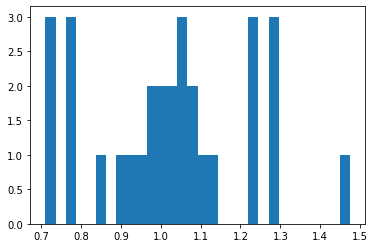

In [44]:
plt.hist(covariance, bins=shots)

In [42]:
print("variance of the covarinace: ", np.var(covariance))
print("standard deviation of the covariance: ", np.sqrt(np.var(covariance)))

variance of the covarinace:  0.03620358527223754
standard deviation of the covariance:  0.19027239755739017


In [41]:
np.mean(covariance)

1.023101097113919

This is as expected; as the phase was varied, the covariance of the measurements for any ith shot over all the phases had an average of 1, and a standard deviation of 0.19. this means that the two measurements are good predictors of one another, as expected. That is, the beam splitter does not introduce any sort of phase shift between the two outgoing beams. If we want to calculate the covariance of the average (over all the shots):

In [46]:
avg_covariance = sum(
        map(
            (lambda x,y : (x-np.mean(x0_set))*(y-np.mean(x1_set))), 
                                  x0_set, x1_set)
    )/(steps-1)
print(avg_covariance)

1.0037231784132357


It seems as though, for the average over thirty shots, the covariance is _very_ close to 1, and therefore the two measurements averaged over thirty shots are very closely correlated.